# Formulação de Carvalho

**Variáveis de decisão:**
* $x_v,_c$ =
  \begin{cases}
  1, \text{se o vértice $v$ recebe a cor $c$}\\
  0, \text{caso contrário}\\
  \end{cases}

* $z_c$ =
  \begin{cases}
  1, \text{se a cor $c$ é usada}\\
  0, \text{caso contrário}\\
  \end{cases}

**Restrições**:

* Restrição de maximização

$$\Gamma_C = \max \sum_{c \in C} z_c$$

* Restrição de garatia de coloração única

$$s.a. \quad \sum_{c \in C} x_{v,c} = 1 \quad \forall v \in V$$

* Restrição de garantia que a coloração obtida será própria

$$x_{v,c} + x_{u,c} \leq z_c \quad \forall \{u,v\} \in E(G), \forall c \in C$$

* Restrição de garantia que uma cor $k$ só pode ser usada se algum vértice $v$ recebeu a cor
$k$.

$$z_c \leq \sum_{v \in V} x_{v,c} \quad \forall c \in C$$

* Restrição que afiança que os vértices isoladoss pode receber qualquer cor.

$$x_{v,c} \leq z_c \quad \forall v \in V(G), \forall c \in \mathcal{C} \\$$

* Restrição que assegura que as primeiras cores serão usadas.

$$z_{c'} \leq z_c \quad \forall c, c' \in \mathcal{C} \text{ se } c < c'$$

* Restrição que garante a propriedade de Grundy $O(|V||C|^2)$ . 

$$x_{v,c'} \leq \sum_{u \in N(v)} x_{u,c} \quad \forall v \in V(G), \forall c, c' \in \mathcal{C} \text{ se } c < c'$$

*

$$x_{v,c} \in \{0,1\} \quad \forall v \in V(G), \forall c \in \mathcal{C}$$

*

$$z_c \in \{0,1\} \quad \forall c \in \mathcal{C}$$




In [1]:
# Instalação de pacotes necessários para execução do código
%pip install ortools
%pip install networkx


Note: you may need to restart the kernel to use updated packages.


Vizinhos de cada vértice:
Vértice 0: [1, 2, 3, 4, 5, 8, 10, 11, 12, 14, 15, 16, 17, 18, 19]
Vértice 1: [0, 2, 3, 4, 5, 6, 7, 10, 12, 13, 14, 15, 16, 18, 19]
Vértice 2: [0, 1, 3, 4, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18]
Vértice 3: [0, 1, 2, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 18, 19]
Vértice 4: [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Vértice 5: [0, 1, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 16, 18, 19]
Vértice 6: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19]
Vértice 7: [1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Vértice 8: [0, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Vértice 9: [4, 5, 6, 7, 8, 11, 12, 13, 15, 17, 18]
Vértice 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Vértice 11: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19]
Vértice 12: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
Vértice 13: [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 18, 19]
Vértic

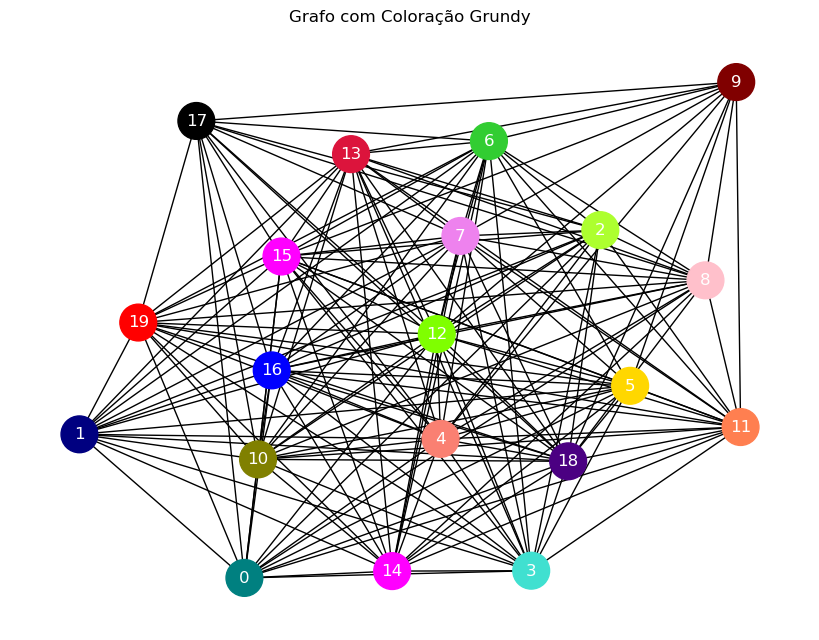


Informações adicionais:
Problema resolvido em 31.992000 seg
Problema resolvido em 0 iterações
Problema resolvido em 0 nós de branch-and-bound


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from ortools.linear_solver import pywraplp

def coloracao_carvalho(G):

    # Verificar se o grafo foi corretamente inicializado
    vertices = list(G.nodes())
    n = len(vertices)
    if n == 0:
        raise ValueError("O grafo não foi inicializado corretamente.")

    # Array de 100 cores fornecido
    color_array = [
        "gold", "red", "violet", "maroon", "limegreen", "greenyellow", "black",
        "blue", "teal", "indigo", "crimson", "turquoise", "coral", "pink",
        "olive", "navy", "magenta", "salmon", "fuchsia", "chartreuse", "skyblue",
        "beige", "sienna", "lavender", "aquamarine", "plum", "steelblue", "khaki",
        "moccasin", "peru", "chocolate", "orchid", "slateblue", "forestgreen",
        "seagreen", "tomato", "turquoise", "mediumvioletred", "cadetblue", "darkcyan",
        "palevioletred", "dodgerblue", "lightseagreen", "lightsalmon", "darkslategray",
        "darkmagenta", "yellowgreen", "mediumpurple", "lightcoral", "springgreen",
        "darkorchid", "powderblue", "rosybrown", "darkgoldenrod", "palegreen", "hotpink",
        "palegoldenrod", "mistyrose", "lightpink", "lime", "midnightblue", "darkseagreen",
        "indianred", "lightgreen", "darkolivegreen", "sandybrown", "mediumslateblue",
        "lightsteelblue", "firebrick", "oceanblue", "lightcyan", "thistle", "lawngreen",
        "royalblue", "seashell", "darkkhaki", "lightskyblue", "navajowhite", "lavenderblush",
        "cornflowerblue", "goldenrod", "darkblue", "darkturquoise", "mediumspringgreen",
        "wheat", "papayawhip", "lightgoldenrodyellow", "peru", "bisque", "peachpuff",
        "lemonchiffon", "lightgray", "mediumorchid", "darkred", "burlywood", "slategray",
        "mediumseagreen", "antiquewhite", "honeydew", "mintcream"
    ]

    # Inicializando o solver
    solver = pywraplp.Solver.CreateSolver('SCIP')

    # Verificar se o solver foi corretamente inicializado
    if not solver:
        raise ValueError("O solver não foi inicializado corretamente.")

    # Definir o tempo máximo de execução para o solver (30 minutos)
    solver.SetTimeLimit(1800 * 1000)  # 1800 segundos em milissegundos

    # Variáveis de decisão x[v, c]: 1 se o vértice v recebe a cor c, 0 caso contrário
    x = {}
    num_colors = len(color_array)  # Número de cores é o tamanho do array de cores fornecido
    for v in vertices:
        for c in range(1, num_colors + 1):
            x[v, c] = solver.BoolVar(f'x[{v},{c}]')

    # Variáveis z_c: 1 se a cor c é usada, 0 caso contrário
    z = {}
    for c in range(1, num_colors + 1):
        z[c] = solver.BoolVar(f'z[{c}]')

    # 1. Maximizar o número de cores usadas
    solver.Maximize(solver.Sum(z[c] for c in range(1, num_colors + 1)))

    # 2. Restrição de coloração única: cada vértice recebe exatamente uma cor
    for v in vertices:
        solver.Add(solver.Sum(x[v, c] for c in range(1, num_colors + 1)) == 1)

    # 3. Garantir que vértices adjacentes não recebam a mesma cor
    for v in vertices:
        for u in G.neighbors(v):
            if v < u:  # Evitar duplicação de restrições
                for c in range(1, num_colors + 1):
                    solver.Add(x[v, c] + x[u, c] <= z[c])

    # 4. Garantir que uma cor só pode ser usada se for atribuída a pelo menos um vértice
    for c in range(1, num_colors + 1):
        solver.Add(z[c] <= solver.Sum(x[v, c] for v in vertices))

    # 5. Garantir que as cores sejam usadas em ordem
    for c in range(2, num_colors + 1):
        solver.Add(z[c] <= z[c - 1])

    # 6. Garantir que os vértices isolados possam receber qualquer cor
    for v in vertices:
        for c in range(1, num_colors + 1):
            solver.Add(x[v, c] <= z[c])

    # 7. Propriedade de Grundy: restrição de vizinhança
    for v in vertices:
        for c in range(2, num_colors + 1):
            solver.Add(x[v, c] <= solver.Sum(x[u, c-1] for u in G.neighbors(v)))

    # Resolver o problema
    print("Resolvendo o problema...")
    status = solver.Solve()

    # Verificar o status da solução
    color_map = []

    if status == pywraplp.Solver.OPTIMAL:
        print('Solução ótima encontrada:')
        print('Valor objetivo =', solver.Objective().Value())

        for v in vertices:
            for c in range(1, num_colors + 1):
                if x[v, c].solution_value() == 1:
                    color_map.append(color_array[c-1])

    elif status == pywraplp.Solver.FEASIBLE:
        print('Uma solução viável foi encontrada dentro do limite de tempo.')
        print('Valor objetivo =', solver.Objective().Value())

        for v in vertices:
            for c in range(1, num_colors + 1):
                if x[v, c].solution_value() == 1:
                    color_map.append(color_array[c-1])

    else:
        print('O problema não tem uma solução ótima dentro do limite de tempo.')

    return {
        "Time": solver.WallTime()/1000,
        "Iterations": solver.iterations(),
        "Nodes": solver.nodes()
    }

In [ ]:
# Lista de tamanhos
sizes = [10, 13, 15, 18, 20]

# Para p = 0.5 e 0.8
for s in sizes:
    print(f"\nColoração Grundy para G({s}, 0.5):")
    G = nx.gnp_random_graph(s, 0.5)
    result1 = coloracao_carvalho(G)

    print(f"\nColoração Grundy para G({s}, 0.8):")
    G = nx.gnp_random_graph(s, 0.8)
    result2 = coloracao_carvalho(G)

    print(f"\nResultados para G({s}, 0.5): {result1}")
    print(f"Resultados para G({s}, 0.8): {result2}")